<a href="https://colab.research.google.com/github/dhamu2908/Deep-Learning-DA6401/blob/main/Deep_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing packages
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import pandas as pd
import numpy as np
import wandb
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dhamu2908 (m_dhamu2908) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


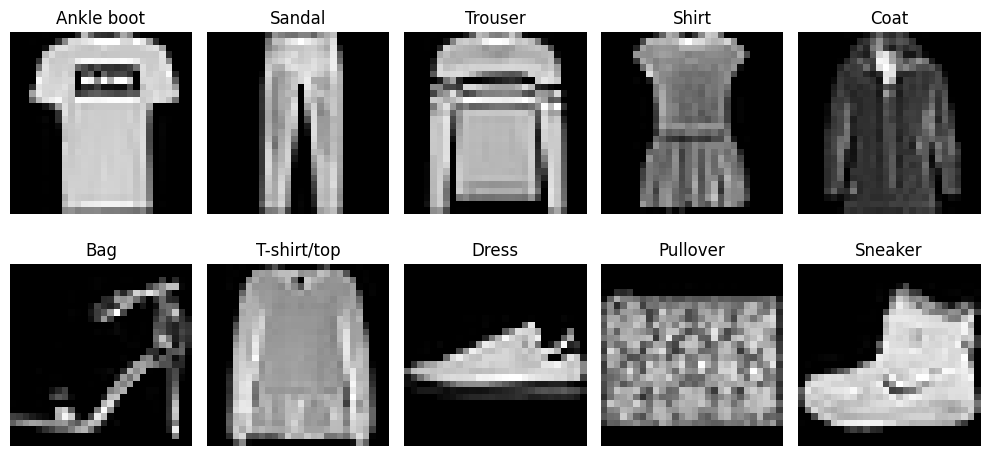

In [2]:
# Loading the Fashion MNIST dataset
(train_data, train_labels), (test_data , test_labels) = fashion_mnist.load_data()

# Defining class names
fashion_classes = ['Ankle boot', 'Sandal', 'Trouser', 'Shirt', 'Coat', 'Bag', 'T-shirt/top', 'Dress', 'Pullover', 'Sneaker']

# Function to select one image for one class
def select_images_per_class(images, labels, num_classes=10):
    selected_images = []
    for class_id in range(num_classes):
        # Find the first image that belongs to the current class
        first_image_index = np.where(labels == class_id)[0][0]
        selected_images.append(images[first_image_index])
    return selected_images

# Selecting one image for one class
selected_images = select_images_per_class(train_data, train_labels)

# Function to visualize
def visualize_and_log_images(images, class_names, save_filename='fashion_mnist_samples.png'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_filename)

    wandb.login()
    wandb.init(project='Deep_Learning_Assignment', name = "Fashion-Images")
    wandb.log({"Fashion MNIST Samples": wandb.Image(save_filename)})

    plt.show()

visualize_and_log_images(selected_images, fashion_classes)

In [5]:
# Function to preprocess
def preprocess_image_data(images):
    return np.array([img.flatten() / 255.0 for img in images])

# Loading the Fashion MNIST dataset
(train_data, train_labels), (test_data, y_test_data) = fashion_mnist.load_data()

# Preprocessing the training and test datasets
x_total_train_processed = preprocess_image_data(train_data)
x_test_processed = preprocess_image_data(test_data)

# Split the training data into training and validation sets randomly
train_validation_split_ratio = 0.9  # 90% training, 10% validation
x_train_final, x_validation_final, y_train_final, y_validation_final = train_test_split(
    x_total_train_processed, train_labels, train_size=train_validation_split_ratio, random_state=42
)

flattened_test_data = []


for i in range(0, len(test_data)):
    flattened_test_data.append(test_data[i].flatten()/255.0)

split_index = int(len(x_total_train_processed) * train_validation_split_ratio)

x_train_final = x_total_train_processed[:split_index]
y_train_final = train_labels[:split_index]
x_validation_final = x_total_train_processed[split_index:]
y_validation_final = train_labels[split_index:]
